In [ ]:
# Python Image Processing Cookbook
# https://subscription.packtpub.com/book/data/9781789537147/4/ch04lvl1sec29/applying-morphological-operators-to-a-binary-image

In [1]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage import morphology as morph

from scipy.ndimage.morphology import binary_erosion, binary_dilation, binary_fill_holes 
from scipy.ndimage.morphology import morphological_gradient, distance_transform_edt

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
tn1 = rgb2gray(imread('tn1.png'))
thres = threshold_otsu(tn1)

In [3]:
tn1 = (tn1 > thres).astype(np.uint8)

In [4]:
tn1

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

In [5]:
tn1.shape

(1354, 2478)

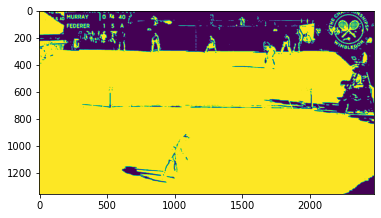

In [15]:
plt.imshow(tn1)

In [7]:
eroded = binary_erosion(tn1, structure=np.ones((2,2)), iterations=20)[20:,20:]
eroded = 1 - eroded
dilated = binary_dilation(eroded, structure=np.ones((11,11)))
boundary = np.clip(dilated.astype(np.int) - eroded.astype(np.int), 0, 1)
dt = distance_transform_edt(np.logical_not(boundary))
edges = 1 - morphological_gradient(tn1, size=3) 

In [12]:
im = rgb2gray(imread('tn2.png'))
im = (im > 0).astype(np.uint8)
disk2 = morph.disk(radius=2)
disk8 = morph.disk(radius=8)
eroded2 = morph.binary_erosion(im, selem=disk2)
eroded8 = morph.binary_erosion(im, selem=disk8)
labeled = morph.label(eroded8, connectivity=1)
dilated2 = morph.binary_dilation(im, selem=disk2)
edges = dilated2.astype(np.int) - eroded2.astype(np.int)
skeleton = morph.skeletonize(im)

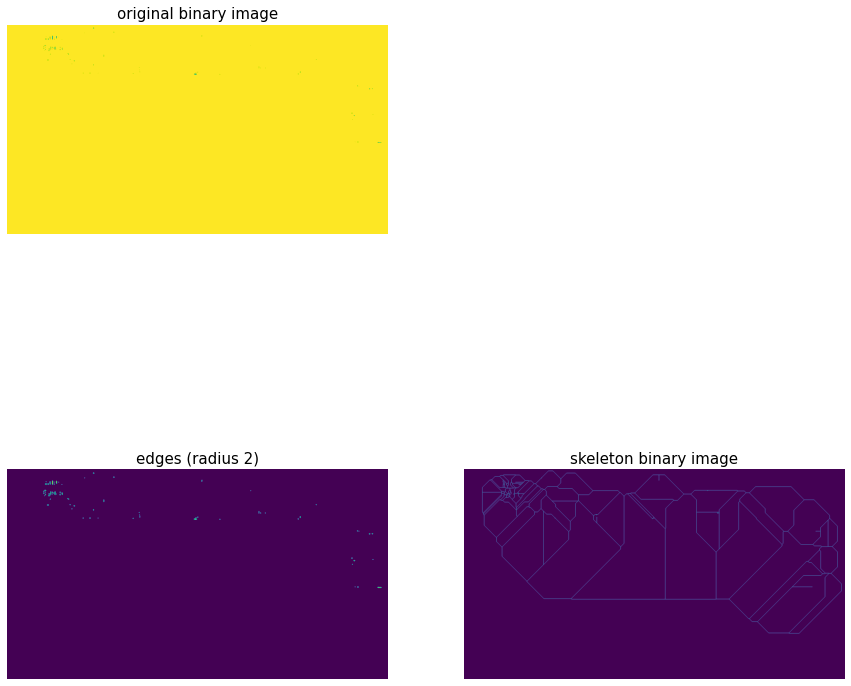

In [14]:
plt.figure(figsize=(15,15))
plt.subplot(221) 
plt.imshow(im) 
plt.axis('off')
plt.title('original binary image', size=15)

# plt.subplot(222)
# plt.imshow(labeled, cmap='spectral')
# plt.axis('off')
# plt.title('eroded with connected components (radius 8)', size=15)
plt.subplot(223)
plt.imshow(edges)
plt.axis('off')
plt.title('edges (radius 2)', size=15)
plt.subplot(224)
plt.imshow(skeleton)
plt.axis('off')
plt.title('skeleton binary image', size=15)
plt.show()